# TMDB MOVIE DATA INVETIGATION

# Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction
IMDb is andatabase of information related to films, television programs, home videos, video games, and streaming content online including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. From this big database, a sub database was created which is "The Movie Database (TMDb) was created. The Movie Database (TMDb) is a community built movie and TV database. Every piece of data has been added by this amazing community dating back to 2008. The data set -we are going to investigate- contains information about 10,000 movies collected from The Movie Database (TMDb)

I will try to answer some questions ;
<ul>
<li>Find fifth Adventure movies  in the top and bottom with revenue, and are those two things related ?</li>
<li>What's the average Run Time for the movies and Does it affect the popularity ?</li>
<li>Does Adventure movies get better with years ?</li>
</ul>

# import Libraries


In [37]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# General Properties

In [38]:
data = pd.read_csv('tmdb_movies.csv')
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [39]:
data.shape

(4803, 20)

In [40]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'vote_count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

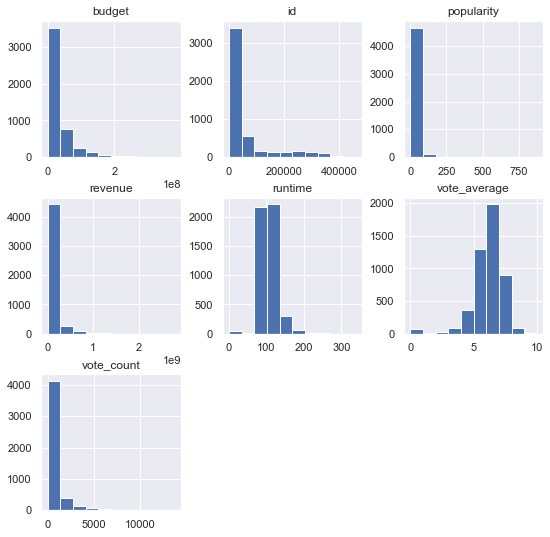

In [42]:
data.hist(figsize = (9 , 9))

# impression 

1- There are many columns such as vote_count  that we will not need to use in our analysis
2- Revenue is not specified as a currency, so the assumption made will be dollar amount.
3- convet dtype of the  revenue to int and  release_date dtype into time dtype
4- also there are some Columns not need to our analysis Will Drop it from DataFrame Like  
     homepage, tagline, keywords, production_companies and Others .


# Data Wrangling

In [43]:
data.drop([ 'budget', 'homepage', 'tagline', 'keywords',
             'production_companies','vote_count'] 
                , axis=1, inplace=True)


Check data after dropping unnecessary columns

In [44]:
data.head()

,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1


Drop Total duplicates from data


In [45]:
data.drop_duplicates(inplace=True)

get nan values in Current columns

In [46]:
data.isnull().sum()

genres                  0
id                      0
original_language       0
original_title          0
overview                3
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
dtype: int64

fill release_date column with zero values:

In [47]:
data.fillna(0, inplace = True)

check nan data secondly

In [48]:
data.isnull().sum()

genres                  0
id                      0
original_language       0
original_title          0
overview                0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
dtype: int64

#drop null values from data after convert 0 to null 

In [49]:
data = data.replace(0, np.NAN)
data.dropna(inplace = True)

In [50]:
# change the dtype of the revenue , popularity to int and change the release_date dtype from object to time dtype
data['revenue'] = data['revenue'].astype(int)
data['popularity'] = data['popularity'].astype(int)
data['release_date'] = pd.to_datetime(data['release_date'])


In [51]:
# check data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3373 entries, 0 to 4798
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   genres                3373 non-null   object        
 1   id                    3373 non-null   int64         
 2   original_language     3373 non-null   object        
 3   original_title        3373 non-null   object        
 4   overview              3373 non-null   object        
 5   popularity            3373 non-null   int32         
 6   production_countries  3373 non-null   object        
 7   release_date          3373 non-null   datetime64[ns]
 8   revenue               3373 non-null   int32         
 9   runtime               3373 non-null   float64       
 10  spoken_languages      3373 non-null   object        
 11  status                3373 non-null   object        
 12  title                 3373 non-null   object        
 13  vote_average      

In [52]:
#finally , just get a new data frame of Adventure Movies.
data_Adventure = data[data['genres'].str.contains("Adventure")]

#check data_Adventure
data_Adventure.head()

,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,-2147483648,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1
5,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9


# Exploratory Data Analysis

# Adventure Movies TOP + Buttom

In [53]:
#get top and bottom Adventure movies based on revenue
data_adventure_Top=data_Adventure.sort_values('revenue',axis=0,ascending=False)
data_adventure_Top_simple=data_adventure_Top[['original_title','revenue']]
print('the Fifth Top Adventure Movies by Revenue')
print(data_adventure_Top_simple.head(5))
print('\n last 5  Adventure Movies by Revenue ')
print(data_adventure_Top_simple.tail(5))

the Fifth Top Adventure Movies by Revenue
              original_title     revenue
16              The Avengers  1519557910
28            Jurassic World  1513528810
7    Avengers: Age of Ultron  1405403694
124                   Frozen  1274219009
31                Iron Man 3  1215439994

 last 5  Adventure Movies by Revenue 
                                  original_title     revenue
1672                                        辛亥革命      108348
1999  The Adventurer: The Curse of the Midas Box        6399
1562                 Rugrats in Paris: The Movie         103
2806                                    태극기 휘날리며          15
0                                         Avatar -2147483648


In [54]:
# get top and bottom movies by voting average.
data_adventure_Top=data_Adventure.sort_values('vote_average',axis=0,ascending=False)
data_adventure_Top_simple=data_adventure_Top[['original_title','vote_average']]
print('the Fifth Top Adventure Movies by Voting average')
print(data_adventure_Top_simple.head(5))
print('\n last 5  Adventure Movies by voting average')
print(data_adventure_Top_simple.tail(5))


the Fifth Top Adventure Movies by Voting average
               original_title  vote_average
2294                 千と千尋の神隠し           8.3
2247                    もののけ姫           8.2
1990  The Empire Strikes Back           8.2
1987                  ハウルの動く城           8.2
2912                Star Wars           8.1

 last 5  Adventure Movies by voting average
                     original_title  vote_average
2357  The Legend of the Lone Ranger           3.7
2003              Jaws: The Revenge           3.5
1939                     BloodRayne           3.5
2122                     Epic Movie           3.2
2899                           兔侠传奇           3.0


doesn't look like a similar list in either, lets go to see if those two values are related with a scatterplot!

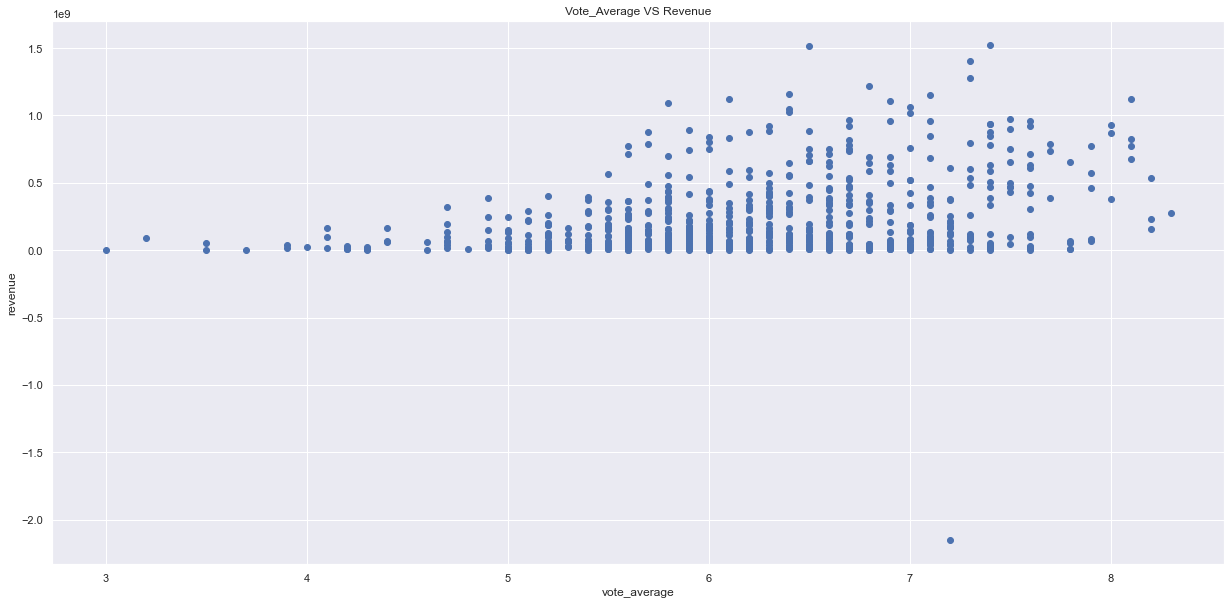

In [55]:
plt.scatter(data_Adventure['vote_average'], data_Adventure['revenue'])
plt.title("Vote_Average VS Revenue")
plt.xlabel("vote_average")
plt.ylabel("revenue")
plt.show()


lets see if we can get any better results with the corralation coefficient. and find an outlayer .

In [56]:
data_Adventure[['vote_average','revenue']].corr()

,vote_average,revenue
vote_average,1.000000,0.309369
revenue,0.309369,1.000000


not a very strong corralation , make me cannot belive that revenue is near to 0.3 with good vote 

# average Run Time for the movies and Does it affect the popularity

In [57]:
runtime_avg = data['runtime'].mean()
runtime_avg

110.41120664097242

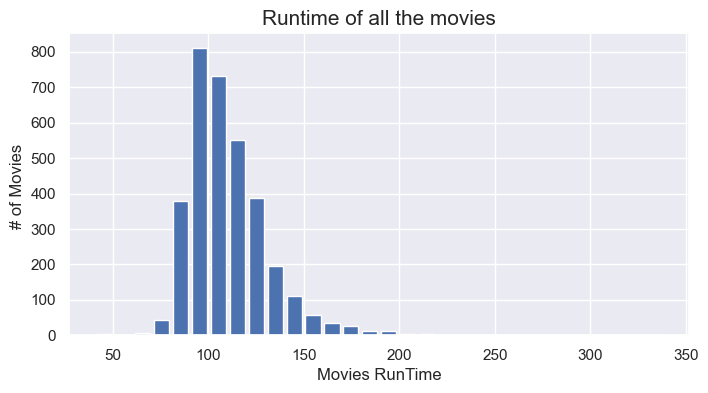

In [58]:
#plot a histogram of runtime With movies

#figure size(width, height)
plt.figure(figsize=(8,4), dpi = 100)

#x-axis 
plt.xlabel('Movies RunTime', fontsize = 12)
#y-axis 
plt.ylabel('# of Movies ', fontsize=12)
#graph name
plt.title('Runtime of all the movies', fontsize=15)

#histogram plot
plt.hist(data['runtime'], rwidth = 0.8, bins =30)
#show plot
plt.show()

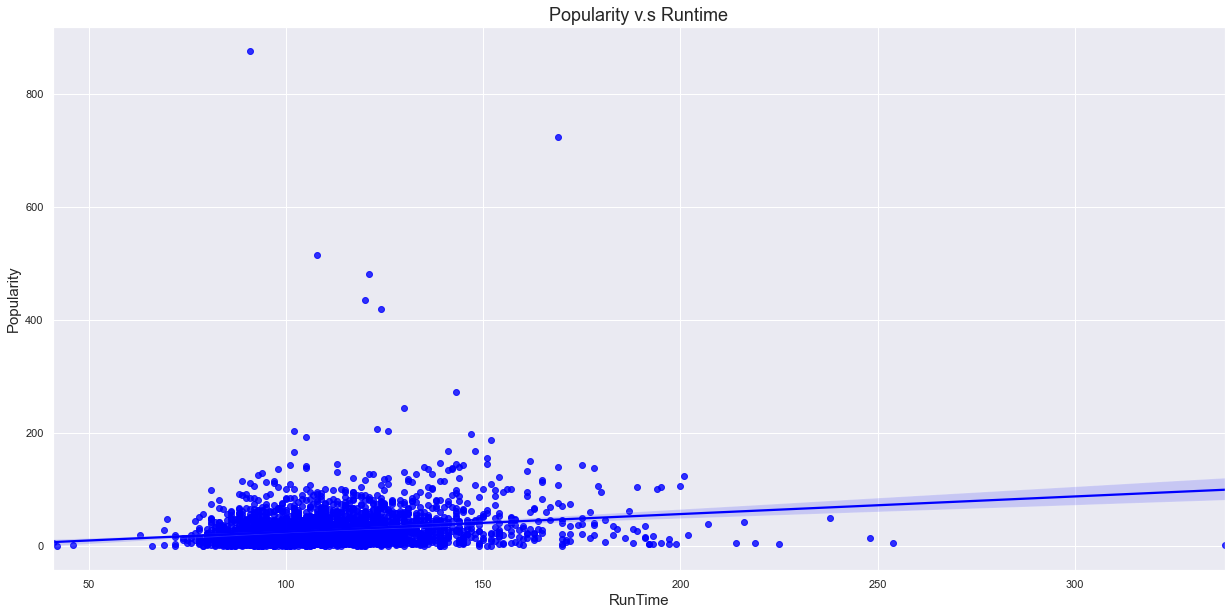

In [59]:
#scatter plot for studying  relationship between Runtime and popularity in data .

Shape_SC_plot = sns.regplot(x=data['runtime'],y=data['popularity'],color='blue')

#put title and the labels of the scatter plot.
Shape_SC_plot.set_title("Popularity v.s Runtime",fontsize=18)
Shape_SC_plot.set_xlabel("RunTime",fontsize=15)
Shape_SC_plot.set_ylabel("Popularity",fontsize=15)

#figure size.
sns.set(rc={'figure.figsize':(21,10)})

After Calculated average of the Run time for the movies is a round 110 mins and from histogram,
it's observed that most of the movies are between 100 to 150 mins as a run time. 
and from scatter plot the relationship between the run time and the
popularity is tending to be positive linear relationship but I can say
the run time is a low contribution factor of the movies popularity.

# is Adventure movies get better with years ?

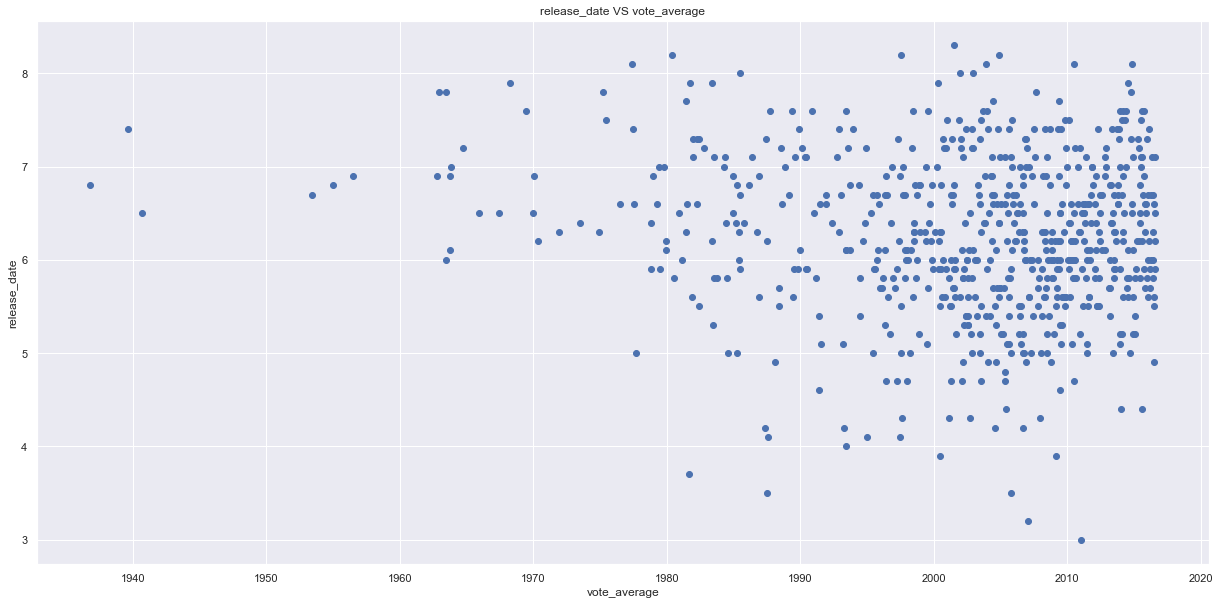

,vote_average
vote_average,1.0


In [60]:
#get scatterplot and  corralation between release_date and vote_average for the Adventure movies .
plt.scatter(data_Adventure['release_date'], data_Adventure['vote_average'])
plt.title("release_date VS vote_average")
plt.xlabel("vote_average")
plt.ylabel("release_date")
plt.show()
data_Adventure[['release_date','vote_average']].corr()

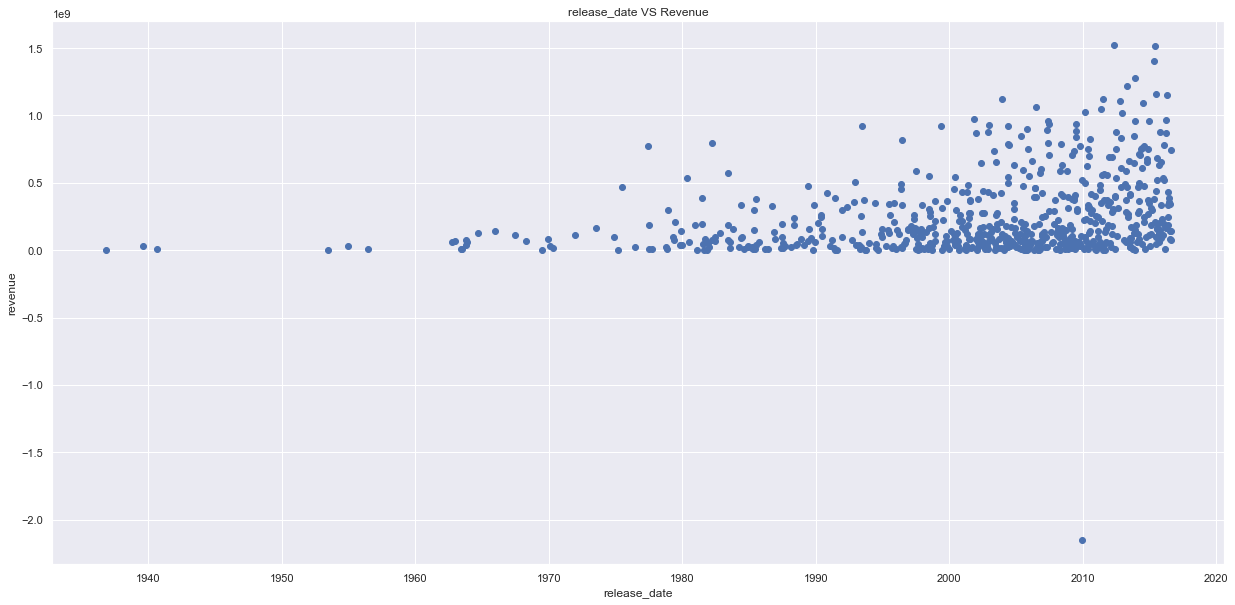

,vote_average,revenue
vote_average,1.000000,0.309369
revenue,0.309369,1.000000


In [61]:
#with revenue
plt.scatter(data_Adventure['release_date'], data_Adventure['revenue'])
plt.title("release_date VS Revenue")
plt.xlabel("release_date")
plt.ylabel("revenue")
plt.show()
data_Adventure[['vote_average','revenue']].corr()

while there are definetly more movies in later years, quality doesn't seem to change much.

# Conclusions

From All the analysis performed we can conclude that :

<ul>
<li>    1- Vote Average does not greatly influence revenue .    </li>
<li>    2- the The Empire Strikes Back was the third great Movie .</li>
<li> 3- The average run time for the movies is around 110 mins,
       and the majority of the movies has run time between 100 mins to 120 or 150 mins.</li>
    <li>        4- Adventure movies not better With time , even though more have been made .  </li>
</ul>
   




# Limitations

 - Univariat analysis like average runtime for a movie is only specific for this dataset
 - there are many missing values, missing data etc..
 - it is difficult to determine the best type of Movies .
 - colums need to transform that have '|' separation but in project iam not use this colums so i drop .

# Resource

https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/